### <p style="text-align: right;"> &#9989; Put your name here.</p>

# PDE's
Discussion found in Gezerlis

Brownian motion follows a PDE. $\phi$ is the probability density

Elliptic: $\frac{\partial^2 \phi}{\partial x^2} + \frac{\partial^2 \phi}{\partial y^2} = f(x,y), \quad \phi = \phi(x,y)$

Hyperbolic (wavey): $\frac{\partial^2 \phi}{\partial t^2} - c^2 \frac{\partial^2 \phi}{\partial x^2} = f(x,y), \quad \phi = \phi(x,t)$

Parabolic $\frac{\partial \phi}{\partial t} - D \frac{\partial^2 \phi}{\partial x^2} = f(x,t),\quad D>0, \quad \phi = \phi(x,t)$

Provide boundary conditions and get to it

Parabolic PDE implementation in 1D:

$$
\frac{\phi_{j,k+1}-\phi_{j,k}}{\Delta t} = D \frac{\phi_{j+1,k} - 2\phi_{j,k}+\phi_{j-1,k}}{\left(\Delta x\right)^2}
$$
Explicit scheme
$$
\phi_{j,k+1} = \gamma \phi_{j+1,k} + (1-2\gamma) \phi_{j,k} + \gamma \phi_{j-1,k} \\
\gamma \equiv D \frac{\Delta t}{(\Delta x)^2}
$$
Note: Without fourier transforms, we can actually find when this falls apart. Space precision requires smaller timesteps, which can get pretty costly in the parabolic case. 

$$
-\gamma \phi_{j+1,k} + \left( 1 + 2\gamma\right) \phi_{j,k} - \gamma \phi_{j-1,k} = \phi_{j,k-1}
$$

Tridiagonal

# PHY480 Day 26

## In-class assignment: Diffusion equation

In this in-class assignment we explore a parabolic partial differential equation in one space and one time dimension. This type of equation describes a diffusion or heat transfer process, as well as the probability of the particle experiencing Brownian motion to be at position $x$ at time $t$.


In [75]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


**Task 1.** We consider the simplest realization of random walk -- one dimensional. The probability, called $\varphi(x,t)$ here, satisfies the following equation:

$$
\frac{\partial\varphi}{\partial t}=D\frac{\partial^2\varphi}{\partial x^2}.
$$

The domain of $x$ is $x\in[0,L]$. We apply simple boundary conditions:

$$
\varphi(0,t)=0,\,\,\,\,\,\varphi(L,t)=0.
$$

As the initial condition we take $\varphi(x,0)=1$ for $x=L/2$ and $0$ otherwise.

Program the explcit time stepping scheme. Experiment with settng different time step and see if there is an upper bound on it.



In [84]:
# parameters

# interval length
L = 2
# number of points for x discretization
N = 1000
# step on x
dx = L/N
# step on t
dt = 0.000001

# the diffusion constant
D = 1

# auxiliary
g = D*dt/dx/dx

# number of time steps
Nt = 100


# YOUR CODE HERE
def explicit_update_phi(phi_input, dx, dt, D):
    phi = phi_input # saves time recalling phi
    gamma = D*dt/(dx**2)

    phi_p = phi*0
    phi_p[1:-1] = gamma*phi[2:] + gamma*phi[:-2] + (1-2*gamma)*phi[1:-1]
    phi_p[0] = gamma*phi[1] + (1-gamma)*phi[0]
    phi_p[-1] = gamma*phi[-2] + (1-gamma)*phi[-1]

    return phi_p


# discretize & initial condition
x = np.linspace(0, L, N)
phi = x*0

## attempt 1
#phi[int(N/2)] = 1

# attempt 2
np.random.seed(1)
random_points = np.random.uniform(0, 1, size=len(phi))
phi[:] = random_points/sum(random_points)


phi_storage = np.zeros((Nt+1, *phi.shape))
phi_storage[0] = phi
t_list = [t for t in range(Nt+1)]

for t in range(Nt):
    phi_p = explicit_update_phi(phi, dx, dt, D)
    phi_storage[t+1] = phi_p
    phi = phi_p

**Task 2.** Plot the solution in space for several times $t$ and compare them.


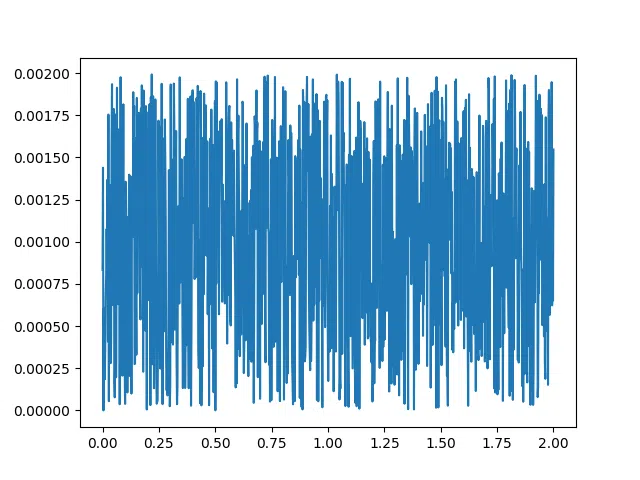

In [85]:
# YOUR CODE HERE
from animator import ParticleAnimator
from matplotlib.animation import PillowWriter
fig, ax = plt.subplots(1,1)

pdist, = ax.plot(x, phi_storage[0])
def update_pdist(ax, framedata):
    pdist.set_ydata(framedata)


filename = 'explicit.webp'

anim = ParticleAnimator(fig, PillowWriter, filename)

total_time = 5
fps = len(phi_storage)/total_time

anim.set_display(fps, total_time)


dist = anim.generate_frame_data(phi_storage)
anim.animate_ax(ax, update_pdist, dist)
anim.make_animation()
plt.close()
anim.display()

**Task 3.** Implement the implicit time stepping scheme. Experiment with the step size and check if you can use a larger step size with the implicit scheme than the one acceptable for the explicit scheme.


In [78]:
# parameters

# interval length
L = 2
# number of points for x discretization
N = 100
# step on x
dx = L/N
# step on t
dt = 0.00005

# the diffusion constant
D = 1

# auxiliary
g = D*dt/dx/dx

# number of time steps
Nt = 100

# YOUR CODE HERE
def make_tridiagonal( N, g ):
    
    A = np.zeros( (N,N) )

    for i in range(N):
        A[i,i] = 1 + 2*g
        if i+1 < N:
            A[i+1,i] = -g
            A[i,i+1] = -g

    return A

A = make_tridiagonal( N, g )
inv_A = np.linalg.inv(A)

# discretize & initial condition
x = np.linspace(0, L, N)
phi = x*0

# attempt 1
phi[int(N/2)] = 1
phi_storage = np.zeros((Nt+1, *phi.shape))
phi_storage[0] = phi
t_list = [t for t in range(Nt+1)]

for t in range(Nt):
    phi[0] = 0
    phi[-1] = 0
    phi_p = inv_A@phi
    phi_storage[t+1] = phi_p
    phi = phi_p




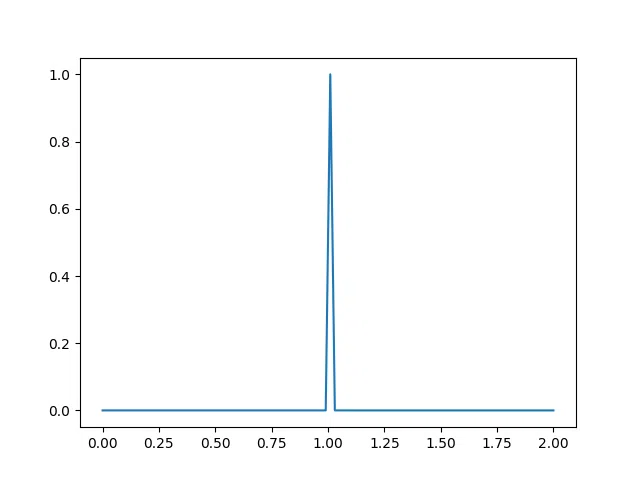

In [79]:
fig, ax = plt.subplots(1,1)

pdist, = ax.plot(x, phi_storage[0])
def update_pdist(ax, framedata):
    pdist.set_ydata(framedata)


filename = 'implicit.webp'

anim = ParticleAnimator(fig, PillowWriter, filename)

total_time = 5
fps = len(phi_storage)/total_time

anim.set_display(fps, total_time)


dist = anim.generate_frame_data(phi_storage)
anim.animate_ax(ax, update_pdist, dist)
anim.make_animation()
plt.close()
anim.display()

**Task 4.** Try an initial condition where each point of $\varphi(x,0)$, except the boundaries, is initialized from a uniform random distribution in $[0,1]$.


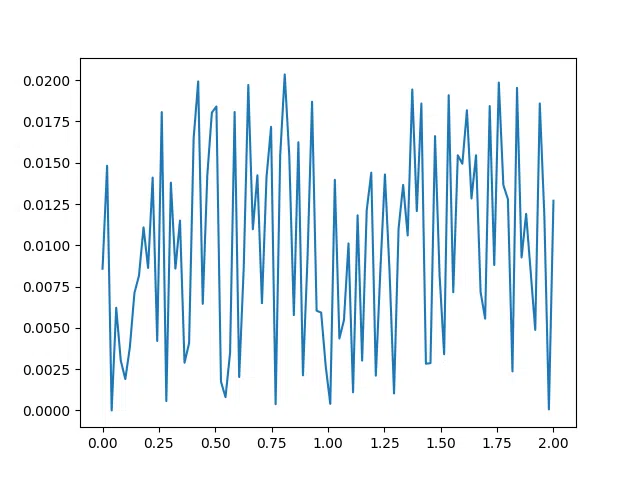

In [83]:
# YOUR CODE HERE
# attempt 2
np.random.seed(1)
random_points = np.random.uniform(0, 1, size=len(phi))
phi[:] = random_points/sum(random_points)


phi_storage = np.zeros((Nt+1, *phi.shape))
phi_storage[0] = phi
t_list = [t for t in range(Nt+1)]

for t in range(Nt):
    phi_p = explicit_update_phi(phi, dx, dt, D)
    phi_storage[t+1] = phi_p
    phi = phi_p

fig, ax = plt.subplots(1,1)

pdist, = ax.plot(x, phi_storage[0])
def update_pdist(ax, framedata):
    pdist.set_ydata(framedata)


filename = 'implicit.webp'

anim = ParticleAnimator(fig, PillowWriter, filename)

total_time = 5
fps = len(phi_storage)/total_time

anim.set_display(fps, total_time)


dist = anim.generate_frame_data(phi_storage)
anim.animate_ax(ax, update_pdist, dist)
anim.make_animation()
plt.close()
anim.display()


&#169; Copyright 2025,  Michigan State University Board of Trustees